In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_df=pd.read_csv(r'C:\Users\PC\Downloads\titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
print('The head of the DF is {0},\n the INFO of the DF is{1}\n,\nThe sum of the NULLS in the DF is{2}'
     .format(titanic_df.head(),titanic_df.info(),titanic_df.isnull().sum())
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
The head of the DF is    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

     

In [6]:
titanic_df=titanic_df.drop(['Cabin'],axis=1)

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df = pd.get_dummies(titanic_df, columns = ['Sex'])
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [9]:
titanic_df.set_index('PassengerId',inplace=True)

In [10]:
#age_pivot=pd.pivot_table(titanic_df,values='Age',columns='Sex_male',index='PassengerId')

#age_pivot.columns = ['Age_FeMale','Age_male']

#titanic_df=titanic_df.merge(age_pivot,left_on='PassengerId',right_index=True,how='left')

#titanic_df

In [11]:
#titanic_df['Age_male']=titanic_df['Age_male'].fillna(titanic_df['Age_male'].median())
#titanic_df['Age_FeMale']=titanic_df['Age_FeMale'].fillna(titanic_df['Age_FeMale'].median())
titanic_df['Embarked']=titanic_df['Embarked'].fillna(0)
titanic_df=titanic_df.dropna()
#titanic_df['Age']=titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Sex_female    0
Sex_male      0
dtype: int64

In [12]:
titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [13]:
titanic_df.shape

(714, 11)

In [14]:
#titanic_df['Family']=titanic_df["SibSp"]+titanic_df['Parch']

In [15]:
def survived():
    survived_= 0
    not_Survived= 0
    for survived in titanic_df['Survived']:
        if survived == 1:
            survived_+=1
        else :
            not_Survived+=1
    print(f'survived = {survived_}\nNot survived = {not_Survived}')
survived()

survived = 290
Not survived = 424


In [16]:
def class_survived():
    survived_A= 0
    survived_B= 0
    survived_C= 0
    for survived , pClass in zip(titanic_df['Survived'],titanic_df['Pclass']):
        if survived == 1 and pClass==1:
            survived_A+=1
        elif survived == 1 and pClass==2:
            survived_B+=1
        elif survived == 1 and pClass==3:
            survived_C+=1
    print(f'Survived in Aclass = {survived_A}\nSurvived in Bclass = {survived_B}\nSurvived in Cclass = {survived_C} ')

class_survived()   
        

Survived in Aclass = 122
Survived in Bclass = 83
Survived in Cclass = 85 


In [17]:
def gender_Survived():
    male= 0
    female= 0
    for survived , gender in zip(titanic_df['Survived'],titanic_df['Sex_male']):
        if survived == 1 and gender==1:
            male+=1
    for survived , gender in zip(titanic_df['Survived'],titanic_df['Sex_female']):
        if survived == 1 and gender==1:
            female+=1
    print(f'Survived Males = {male}\nSurvived Females = {female}\n')

gender_Survived()   

Survived Males = 93
Survived Females = 197



In [18]:
def survived_With_family():
    survived_A= 0
    survived_B= 0
    survived_C= 0
    survived_D= 0
    for survived , sibSp in zip(titanic_df['Survived'],titanic_df['SibSp']):
        if survived == 1 and sibSp==1:
            survived_A+=1
        elif survived == 1 and sibSp==2:
            survived_A+=1
        elif survived == 1 and sibSp==3:
            survived_A+=1
        elif survived == 1 and sibSp==4:
            survived_A+=1
        elif survived == 1 and sibSp==0:
            survived_C+1
        elif survived == 0 and sibSp==0:
            survived_B+=1
        elif survived == 0 and sibSp==1:
            survived_D+1
        elif survived == 0 and sibSp==2:
            survived_D+1
        elif survived == 0 and sibSp==3:
            survived_D+1
    print(f'Survived With one or more of his family= {survived_A}\nSurvived alone = {survived_C}\nDied alone ={survived_B} ')
    print (f'died while having family = {survived_D}')
survived_With_family()

Survived With one or more of his family= 115
Survived alone = 0
Died alone =296 
died while having family = 0


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Family'

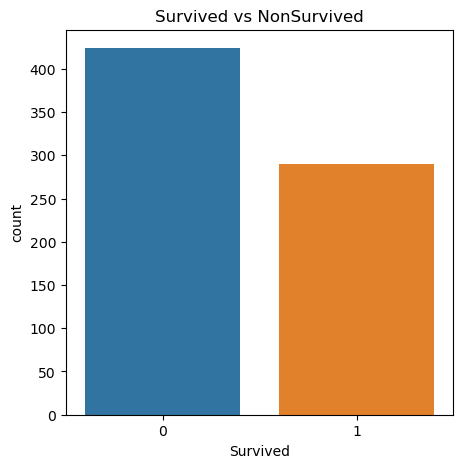

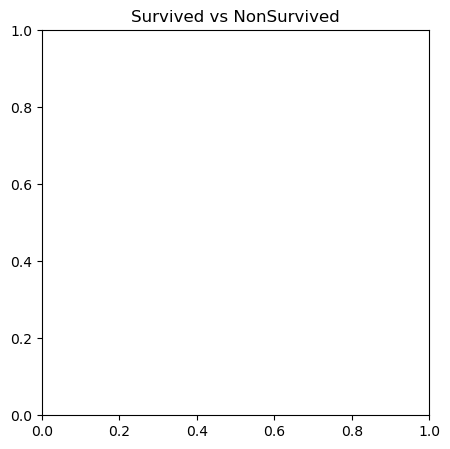

In [19]:
def visualiZation():
    plt.figure(figsize=(5,5))
    plt.title("Survived vs NonSurvived")
    sns.countplot("Survived",data=titanic_df)
    
    plt.figure(figsize=(5,5))
    plt.title("Survived vs NonSurvived")
    sns.countplot("Family",data=titanic_df)
   # plt.xticks[0,1],['Traviling With Family','Travling Alone']
    
    #plt.figure(figsize=(5,5))
    #plt.title("Male vs Female")
    #sns.countplot("Sex",data=titanic_df)
visualiZation()

In [20]:
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,Q,1,0
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,0,1
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,1,0


In [21]:
featuers=titanic_df.drop(['Name','Ticket','Survived','Embarked'],axis=1)
target=titanic_df['Survived']

In [22]:
feature_train,feature_test,target_train,target_test=train_test_split(
    featuers,target,test_size=0.2,shuffle=True,random_state=42)

In [23]:
logistic_regrission=LogisticRegression()
logistic_regrission.fit(feature_train,target_train)


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#pred=logistic_regrission.predict(feature_test)
#acc=accuracy_score(target_test,pred)
#print(acc)
train_predictions = logistic_regrission.predict(feature_train)

test_predictions = logistic_regrission.predict(feature_test)

train_accuracy = accuracy_score(target_train , train_predictions)

test_accuracy = accuracy_score(target_test , test_predictions)

print('train =',train_accuracy)
print('test =',test_accuracy)



train = 0.8073555166374781
test = 0.7482517482517482


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(feature_train,target_train)

RandomForestClassifier()

In [29]:
train_predictions = rf.predict(feature_train)

test_predictions = rf.predict(feature_test)

train_accuracy = accuracy_score(target_train , train_predictions)

test_accuracy = accuracy_score(target_test , test_predictions)

print('train =',train_accuracy)
print('test =',test_accuracy)

train = 0.9912434325744308
test = 0.7832167832167832


In [30]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(feature_train,target_train)

SVC()

In [31]:
train_predictions = svm.predict(feature_train)

test_predictions = svm.predict(feature_test)

train_accuracy = accuracy_score(target_train , train_predictions)

test_accuracy = accuracy_score(target_test , test_predictions)

print('train =',train_accuracy)
print('test =',test_accuracy)

train = 0.6865148861646234
test = 0.6223776223776224


<AxesSubplot:>

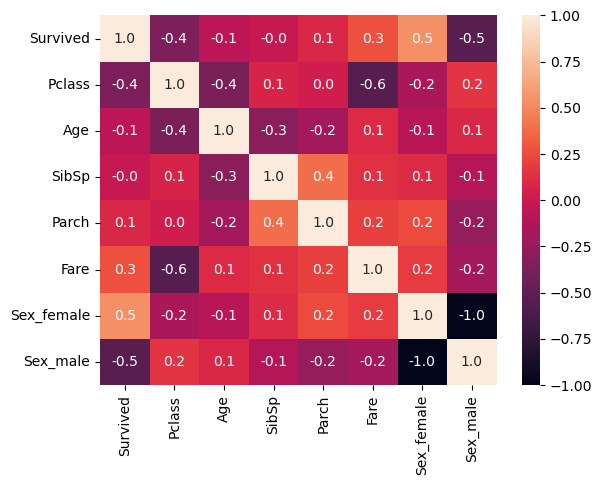

In [32]:
sns.heatmap(titanic_df.corr(),fmt='.1f',annot=True)